<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

#### Name: Akul Arun
#### Student ID: S10243523

In [1]:
# Import the Required Packages
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, Callback

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import csv
import os

##  Scratch Model Evaluation

### 1. Baseline Model Evaluation

In [2]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
base_test = keras.models.load_model('Baseline.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

evaluation_results = base_test.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
25/25 [==============================] - 6s 62ms/step - loss: 2.0786 - acc: 0.2560
Test Loss: 2.0786185264587402
Test Accuracy: 0.25600001215934753


In [3]:
from PIL import Image

x_test = []
y_test = []

class_labels = {'chicken_quesadilla': 0, 'creme_brulee': 1, 'croque_madame': 2, 'fish_and_chips': 3, 'foie_gras': 4,
                'fried_rice': 5, 'paella': 6, 'poutine': 7, 'tacos': 8, 'waffles': 9}

for class_folder in sorted(os.listdir(test_dir)):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        class_label = class_labels[class_folder]

        for image_file in sorted(os.listdir(class_folder_path)):
            image_path = os.path.join(class_folder_path, image_file)
            img = Image.open(image_path)
            img = img.resize((224, 224))
            img_array = np.array(img)
            x_test.append(img_array)
            y_test.append(class_label)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.astype('float32') / 255.0

In [4]:
predictions = base_test.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)
true_labels = test_generator.classes

16/16 [==============================] - 1s 15ms/step


In [5]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels, target_names=class_labels.keys()))


                    precision    recall  f1-score   support

chicken_quesadilla       0.00      0.00      0.00        50
      creme_brulee       0.37      0.28      0.32        50
     croque_madame       0.51      0.44      0.47        50
    fish_and_chips       0.33      0.12      0.18        50
         foie_gras       0.60      0.24      0.34        50
        fried_rice       0.39      0.24      0.30        50
            paella       0.17      0.84      0.28        50
           poutine       0.22      0.26      0.24        50
             tacos       0.29      0.16      0.21        50
           waffles       0.46      0.12      0.19        50

          accuracy                           0.27       500
         macro avg       0.33      0.27      0.25       500
      weighted avg       0.33      0.27      0.25       500



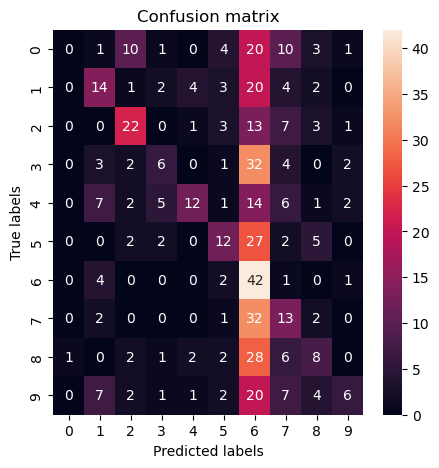

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix_7 = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix_7, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

### 2. Best Scratch Model

In [7]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
best_scratch = keras.models.load_model('Arch_16.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = best_scratch.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 4s 153ms/step - loss: 0.7399 - acc: 0.8000
Test Loss: 0.7399325966835022
Test Accuracy: 0.800000011920929


In [8]:
x_test = []
y_test = []

class_labels = {'chicken_quesadilla': 0, 'creme_brulee': 1, 'croque_madame': 2, 'fish_and_chips': 3, 'foie_gras': 4,
                'fried_rice': 5, 'paella': 6, 'poutine': 7, 'tacos': 8, 'waffles': 9}

for class_folder in sorted(os.listdir(test_dir)):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        class_label = class_labels[class_folder]

        for image_file in sorted(os.listdir(class_folder_path)):
            image_path = os.path.join(class_folder_path, image_file)
            img = Image.open(image_path)
            img = img.resize((224, 224))
            img_array = np.array(img)
            x_test.append(img_array)
            y_test.append(class_label)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.astype('float32') / 255.0

In [9]:
predictions = best_scratch.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)
true_labels = test_generator.classes

16/16 [==============================] - 1s 61ms/step


In [11]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels, target_names=class_labels.keys()))

                    precision    recall  f1-score   support

chicken_quesadilla       0.69      0.80      0.74        50
      creme_brulee       0.89      0.84      0.87        50
     croque_madame       0.90      0.70      0.79        50
    fish_and_chips       0.78      0.84      0.81        50
         foie_gras       0.82      0.72      0.77        50
        fried_rice       0.83      0.68      0.75        50
            paella       0.83      0.88      0.85        50
           poutine       0.70      0.88      0.78        50
             tacos       0.72      0.76      0.74        50
           waffles       0.83      0.80      0.82        50

          accuracy                           0.79       500
         macro avg       0.80      0.79      0.79       500
      weighted avg       0.80      0.79      0.79       500



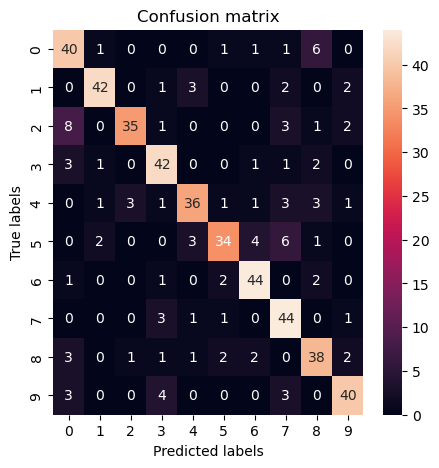

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix_7 = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix_7, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

## Pre-Train Model Evaluation

In [12]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
best_pretrain = keras.models.load_model('mobilenet_finetuning_2.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = best_pretrain.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 86s 4s/step - loss: 0.6899 - acc: 0.8220
Test Loss: 0.689946711063385
Test Accuracy: 0.8220000267028809


In [13]:
x_test = []
y_test = []

class_labels = {'chicken_quesadilla': 0, 'creme_brulee': 1, 'croque_madame': 2, 'fish_and_chips': 3, 'foie_gras': 4,
                'fried_rice': 5, 'paella': 6, 'poutine': 7, 'tacos': 8, 'waffles': 9}

for class_folder in sorted(os.listdir(test_dir)):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        class_label = class_labels[class_folder]

        for image_file in sorted(os.listdir(class_folder_path)):
            image_path = os.path.join(class_folder_path, image_file)
            img = Image.open(image_path)
            img = img.resize((224, 224))
            img_array = np.array(img)
            x_test.append(img_array)
            y_test.append(class_label)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.astype('float32') / 255.0

In [15]:
predictions = best_pretrain.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)
true_labels = test_generator.classes

16/16 [==============================] - 105s 7s/step


In [16]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels, target_names=class_labels.keys()))

                    precision    recall  f1-score   support

chicken_quesadilla       0.85      0.68      0.76        50
      creme_brulee       0.87      0.92      0.89        50
     croque_madame       0.90      0.88      0.89        50
    fish_and_chips       0.88      0.90      0.89        50
         foie_gras       0.86      0.72      0.78        50
        fried_rice       0.82      0.74      0.78        50
            paella       0.74      0.80      0.77        50
           poutine       0.91      0.82      0.86        50
             tacos       0.67      0.86      0.75        50
           waffles       0.82      0.94      0.88        50

          accuracy                           0.83       500
         macro avg       0.83      0.83      0.83       500
      weighted avg       0.83      0.83      0.83       500



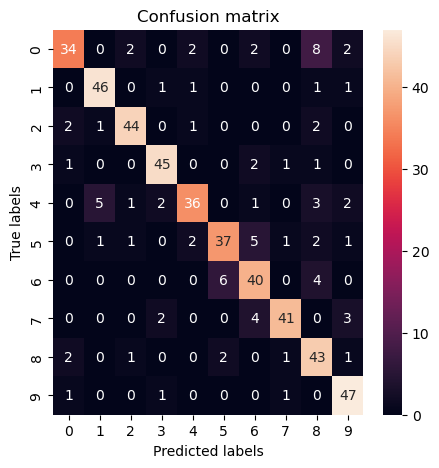

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix_7 = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix_7, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()